In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
import pickle
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [2]:
from sklearn import datasets
#https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand
vms_data = pd.read_csv('Based_on_Hotel_booking.csv')
vms_data.tail()

,Year,week_number,Hotel_previous_week_booking,previous_week_booking,peak
126,2017,48,375,6,0
127,2017,49,216,4,0
128,2017,50,242,4,0
129,2017,51,281,5,0
130,2017,52,267,4,0


In [3]:

df=pd.DataFrame(vms_data)
df.tail()

,Year,week_number,Hotel_previous_week_booking,previous_week_booking,peak
126,2017,48,375,6,0
127,2017,49,216,4,0
128,2017,50,242,4,0
129,2017,51,281,5,0
130,2017,52,267,4,0


Random under-sampling

In [4]:
# class count
class_count_0, class_count_1 = df['peak'].value_counts()

# Separate class
class_0 = df[df['peak'] == 0]
class_1 = df[df['peak'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (53, 5)
class 1: (78, 5)


total class of 1 and 0: 1    78
0    53
Name: peak, dtype: int64


<AxesSubplot:title={'center':'count (peak)'}>

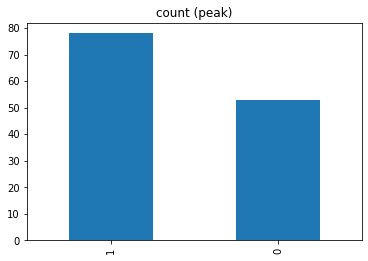

In [5]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:",test_under['peak'].value_counts())# plot the count after under-sampeling
test_under['peak'].value_counts().plot(kind='bar', title='count (peak)')

<AxesSubplot:title={'center':'count (peak)'}>

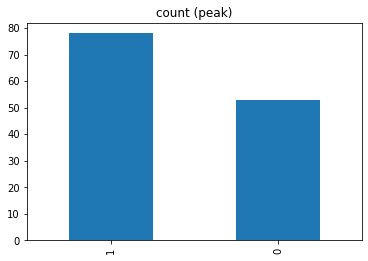

In [6]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)


test_over['peak'].value_counts().plot(kind='bar', title='count (peak)')

In [7]:
test_over

,Year,week_number,Hotel_previous_week_booking,previous_week_booking,peak
65,2016,39,326,5,1
107,2017,29,440,7,1
55,2016,29,368,6,1
122,2017,44,448,7,1
11,2015,37,448,7,1
...,...,...,...,...,...
126,2017,48,375,6,0
127,2017,49,216,4,0
128,2017,50,242,4,0
129,2017,51,281,5,0


In [8]:
X=test_over.loc[:,['week_number','previous_week_booking']]

y=test_over['peak']
X.head()

,week_number,previous_week_booking
65,39,5
107,29,7
55,29,6
122,44,7
11,37,7


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [10]:
logReg = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=42)
logReg.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

In [11]:
y_pred = logReg.predict(X_test)

In [12]:
print(y_pred)

[1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0]


In [13]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.8484848484848485


In [14]:
y_pred = logReg.predict(X_test)
print(X_test)
print(y_pred)

     week_number  previous_week_booking
39            13                      6
37            11                      7
86             8                      7
124           46                      7
81             3                      4
42            16                      7
56            30                      6
58            32                      6
5             31                      5
40            14                      7
28             2                      4
63            37                      6
61            35                      7
11            37                      7
30             4                      3
49            23                      5
33             7                      4
3             29                      5
26            52                      5
8             34                      5
60            34                      7
2             28                      6
109           31                      7
85             7                      6


In [15]:
print(logReg.predict([[2, 3]]))

[0]


c:\Users\Ang\anaconda3\envs\py3_vEnv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [16]:
print(logReg.predict([[34, 5]]))

[0]


c:\Users\Ang\anaconda3\envs\py3_vEnv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [17]:
pickle.dump(logReg, open('peak_model.pkl','wb'))

In [18]:
peak = {'week_number':11,'previous_week_booking':15}
df =  pd.DataFrame([peak])

prediction = logReg.predict(df)

print (prediction)

[1]


In [19]:
print(logReg.predict([[50, 2]]))

[0]


c:\Users\Ang\anaconda3\envs\py3_vEnv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
